In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


#### Load & explore the dataset

In [2]:
df = pd.read_csv('students_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Shape of the dataset
df.shape

(1000, 8)

In [4]:
# Describe the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# Controlling for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Checking the type of the features
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
# Checking the unique values 
print('RACE / ETHNICITY')
print(df['race/ethnicity'].unique(),'\n')

print('PARENTAL LEVEL OF EDUCATION')
print(df['parental level of education'].unique(),'\n')

print('LUNCH')
print(df['lunch'].unique(),'\n')

print('TEST PREPARATION COURSE')
print(df['test preparation course'].unique())

RACE / ETHNICITY
['group B' 'group C' 'group A' 'group D' 'group E'] 

PARENTAL LEVEL OF EDUCATION
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

LUNCH
['standard' 'free/reduced'] 

TEST PREPARATION COURSE
['none' 'completed']


In [8]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

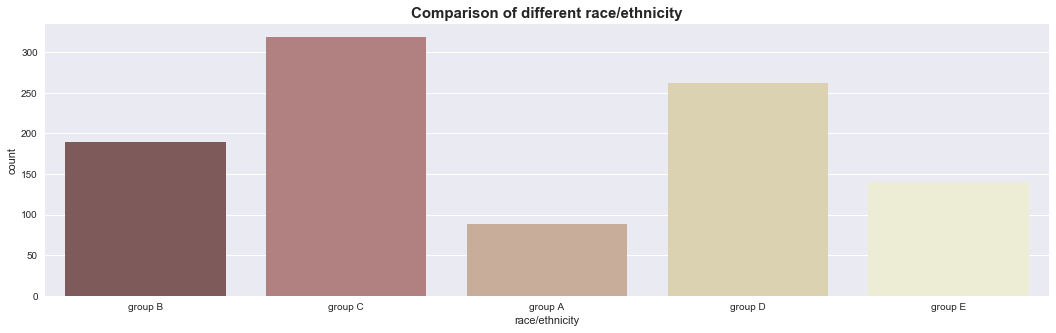

In [9]:
# Visualization of different race/ethnicity
plt.figure(figsize=(18,5))
sns.countplot('race/ethnicity', data = df, palette='pink')
plt.title('Comparison of different race/ethnicity', fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

In [10]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

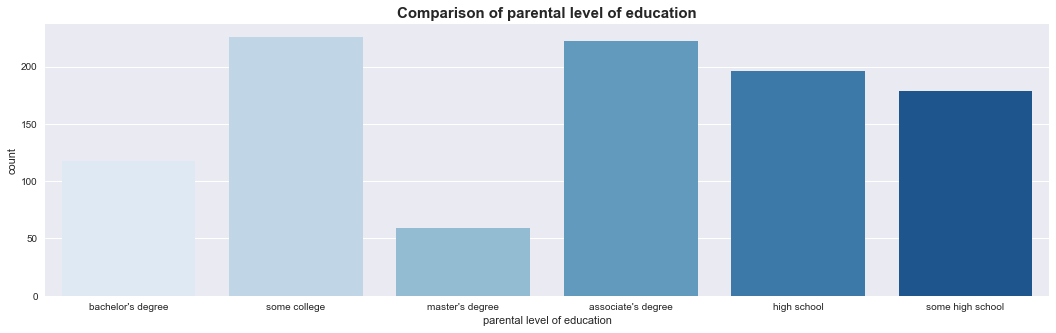

In [11]:
# Visualization of parental level of education
plt.figure(figsize=(18,5))
sns.countplot('parental level of education', data = df, palette='Blues')
plt.title('Comparison of parental level of education', fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

All parents have some kind of education. The majority of them have a degree from a college or an associate's degree. The parents who have a master's degree or a bachelor's degree are the least ones. 

In [12]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

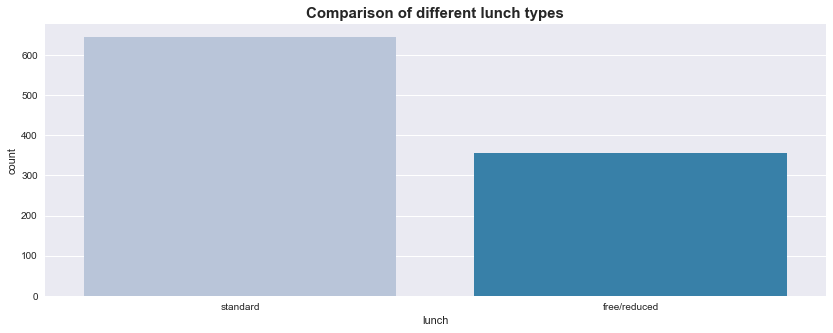

In [13]:
# Visualization of types of lunche
plt.figure(figsize=(14,5))
sns.countplot('lunch', data = df, palette='PuBu')
plt.title('Comparison of different lunch types', fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

In [14]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

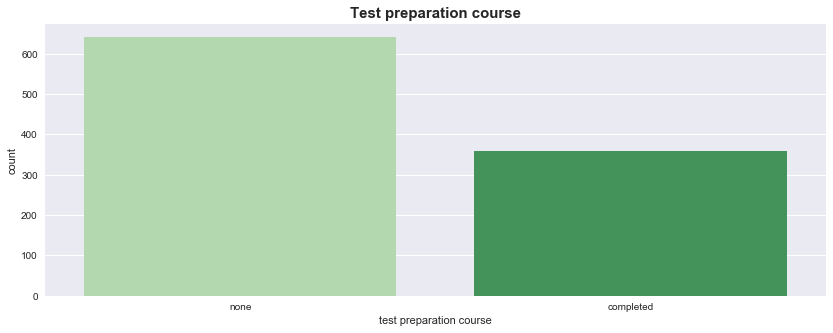

In [15]:
# Visualization of test preparation course
plt.figure(figsize=(14,5))
sns.countplot('test preparation course', data = df, palette='Greens')
plt.title('Test preparation course', fontdict={'fontweight':'bold', 'fontsize':15})
plt.show()

#### Plotting distribution of different subjects

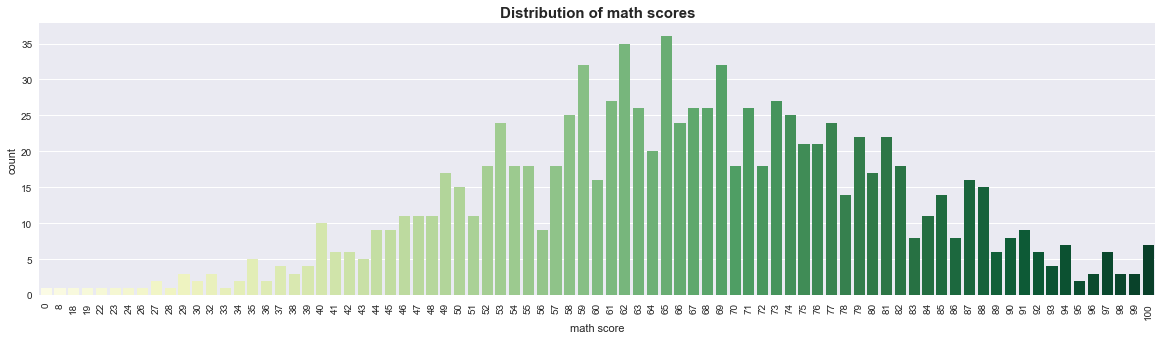

In [16]:
# Plotting the distribution of math score
plt.figure(figsize=(20,5))
sns.countplot('math score', data = df, palette='YlGn')
plt.title('Distribution of math scores', fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.xticks(rotation = 90)
plt.show()

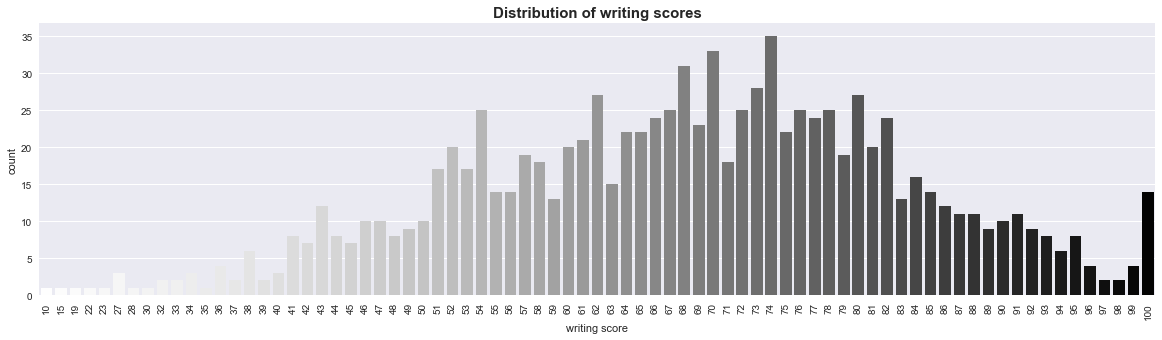

In [17]:
# Plotting the distribution of writing score
plt.figure(figsize=(20,5))
sns.countplot('writing score', data = df, palette='Greys')
plt.title('Distribution of writing scores', fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.xticks(rotation = 90)
plt.show()

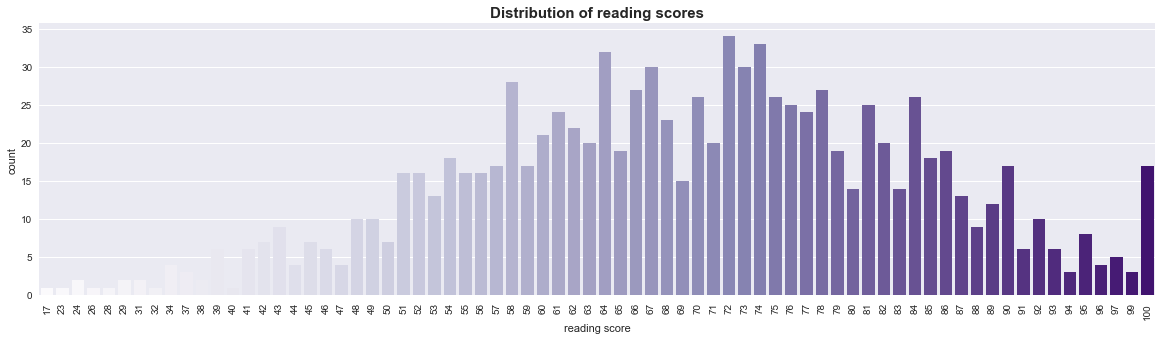

In [18]:
# Plotting the distribution of reading score
plt.figure(figsize=(20,5))
sns.countplot('reading score', data = df, palette='Purples')
plt.title('Distribution of reading scores', fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.xticks(rotation = 90)
plt.show()

All distributions above have a normal distributions. In the first plot with math scores, the score with highest frequency is 65. For writing scores, the score with highest frequency is score 74 and finally for reading scores, the score with highest frequency is score 72. Also, the subject in which more students achived the highest score (100) is reading subject, where more than 15 students achived the highest score.   

#### Checking the percentage of students who pass in each subject

In [19]:
# Checking the number of students who pass math 
m_pass = (df[df['math score']>=50].shape[0])/df.shape[0]
print('The probability of students who pass math is: {}%'.format(round(m_pass,2)*100))
x = 1-m_pass

# Checking the number of students who pass reading 
r_pass = (df[df['reading score']>=50].shape[0])/df.shape[0]
print('The probability of students who pass reading is: {}%'.format(round(r_pass,2)*100))
y = 1-r_pass

# Checking the number of students who pass writing 
w_pass = (df[df['writing score']>=50].shape[0])/df.shape[0]
print('The probability of students who pass writing is: {}%'.format(round(w_pass,2)*100))
z = 1-w_pass

The probability of students who pass math is: 86.0%
The probability of students who pass reading is: 91.0%
The probability of students who pass writing is: 89.0%


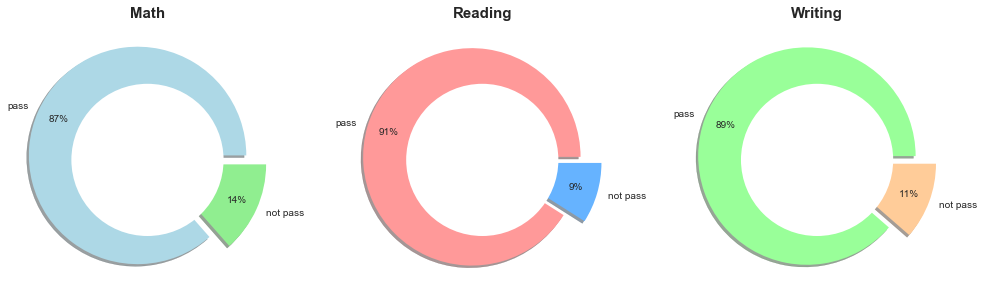

In [20]:
# Visualize the percentage of students who pass/not pass the different subjects
plt.style.use('seaborn')
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
math = [m_pass, x]
plt.pie(math,explode=(.1,.1), labels=['pass','not pass'], autopct='%1.0f%%', shadow=True, colors=['lightblue','lightgreen'], pctdistance=.8)
plt.title('Math', fontdict={'fontweight':'bold', 'fontsize': 15})
centre_circle = plt.Circle((0,0),.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1,3,2)
reading = [r_pass, y]
plt.pie(reading,explode=(.1,.1), labels=['pass','not pass'], autopct='%1.0f%%', shadow=True, colors=['#ff9999','#66b3ff'], pctdistance=.8)
plt.title('Reading',  fontdict={'fontweight':'bold', 'fontsize': 15})
centre_circle = plt.Circle((0,0),.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1,3,3)
writing = [w_pass, z]
plt.pie(writing,explode=(.1,.1), labels=['pass','not pass'], autopct='%1.0f%%', shadow=True, colors=['#99ff99','#ffcc99'], pctdistance=.8)
plt.title('Writing',  fontdict={'fontweight':'bold', 'fontsize': 15})
centre_circle = plt.Circle((0,0),.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

#### Checking the percentage of student who pass all subjects

In [21]:
pass_all = df[(df['math score']>=50) & (df['reading score']>=50) & (df['writing score']>=50)].shape[0]/df.shape[0]
print('The percentage of students who pass all subjects are: {}%'.format(round(pass_all,2)*100))

The percentage of students who pass all subjects are: 81.0%


#### Checking the percentage of students who scored more than 90 in all subjects

In [22]:
pass_90 = df[(df['math score']>90) & (df['reading score']>90) & (df['writing score']>90)].shape[0]/df.shape[0]
print('The percentage of students who pass all subjects with score greater than 90 is: {}%'.format(round(pass_90,2)*100))

The percentage of students who pass all subjects with score greater than 90 is: 2.0%


#### Students who passed the math subject, divided by gender 

In [23]:
male_math = df[(df['gender'] == 'male') & (df['math score']>=50)].shape[0]
female_math = df[(df['gender'] == 'female') & (df['math score']>=50)].shape[0]

print('Male who passed math subject are {}, that is {:,.2f}% of total students'.format(male_math, (male_math/df.shape[0])*100))
print('Female who passed math subject are {}, that is {:,.2f}% of total students'.format(female_math, (female_math/df.shape[0])*100))

Male who passed math subject are 433, that is 43.30% of total students
Female who passed math subject are 432, that is 43.20% of total students


#### Students who passed the reading subject, divided by gender

In [24]:
male_reading = df[(df['gender'] == 'male') & (df['reading score']>=50)].shape[0]
female_reading = df[(df['gender'] == 'female') & (df['reading score']>=50)].shape[0]

print('Male who passed math subject are {}, that is {:,.2f}% of total students'.format(male_reading, (male_reading/df.shape[0])*100))
print('Female who passed math subject are {}, that is {:,.2f}% of total students'.format(female_reading, (female_reading/df.shape[0])*100))

Male who passed math subject are 421, that is 42.10% of total students
Female who passed math subject are 489, that is 48.90% of total students


#### Students who passed the writing subject, divided by gender

In [25]:
male_writing = df[(df['gender'] == 'male') & (df['writing score']>=50)].shape[0]
female_writing = df[(df['gender'] == 'female') & (df['writing score']>=50)].shape[0]

print('Male who passed math subject are {}, that is {:,.2f}% of total students'.format(male_writing, (male_writing/df.shape[0])*100))
print('Female who passed math subject are {}, that is {:,.2f}% of total students'.format(female_writing, (female_writing/df.shape[0])*100))

Male who passed math subject are 399, that is 39.90% of total students
Female who passed math subject are 487, that is 48.70% of total students


The results above shows that female students who pass the sunject are more than male students. It is observed that the number of female students who pass math subject is almost equal to male students who pass this subject. The greatest difference between two genders is observed in writing subject where female students who passed the subject are almost 10% more than male students. 

#### Which gender achived higher score in each subject

In [26]:
male_math_9 = df[(df['gender'] == 'male') & (df['math score']>=90)].shape[0]
female_math_9 = df[(df['gender'] == 'female') & (df['math score']>=90)].shape[0]

print('Male who passed math subject are {}, that is {:,.2f}% of total students'.format(male_math_9, (male_math_9/df.shape[0])*100))
print('Female who passed math subject are {}, that is {:,.2f}% of total students\n'.format(female_math_9, (female_math_9/df.shape[0])*100))


male_reading_9 = df[(df['gender'] == 'male') & (df['reading score']>=90)].shape[0]
female_reading_9 = df[(df['gender'] == 'female') & (df['reading score']>=90)].shape[0]

print('Male who passed math subject are {}, that is {:,.2f}% of total students'.format(male_reading_9, (male_reading_9/df.shape[0])*100))
print('Female who passed math subject are {}, that is {:,.2f}% of total students\n'.format(female_reading_9, (female_reading_9/df.shape[0])*100))


male_writing_9 = df[(df['gender'] == 'male') & (df['writing score']>=90)].shape[0]
female_writing_9 = df[(df['gender'] == 'female') & (df['writing score']>=90)].shape[0]

print('Male who passed math subject are {}, that is {:,.2f}% of total students'.format(male_writing_9, (male_writing_9/df.shape[0])*100))
print('Female who passed math subject are {}, that is {:,.2f}% of total students'.format(female_writing_9, (female_writing_9/df.shape[0])*100))

Male who passed math subject are 35, that is 3.50% of total students
Female who passed math subject are 23, that is 2.30% of total students

Male who passed math subject are 15, that is 1.50% of total students
Female who passed math subject are 64, that is 6.40% of total students

Male who passed math subject are 14, that is 1.40% of total students
Female who passed math subject are 64, that is 6.40% of total students


Male students who passed the math subject are equal to female students but male students who achived a score greater than 90 is more than female students. On the other hand, male students who passed reading and writing subjects are less than female students and the percentage of female students who achived a grade greater than 90 are more than male students.

#### Create a new column with the average grade of all subjects and three more columns with pass/not pass for each subject

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
data = df.copy()

In [29]:
data['overall'] = data[['math score','reading score','writing score']].mean(axis = 1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [30]:
# Take the round value
data['overall'] = round(data.overall)

# Change the type of the new column
data['overall'] = data.overall.astype('int')

In [76]:
# Create new columns with pass / not pass for each subject
data['math_pass'] = np.where(data['math score']<50, 'Fail','Pass')
data['reading_pass'] = np.where(data['reading score']<50, 'Fail','Pass')
data['writing_pass'] = np.where(data['writing score']<50, 'Fail','Pass')
data['status'] = np.where(data['overall']<50, 'Fail','Pass')

In [77]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall,math_pass,reading_pass,writing_pass,status
0,female,group B,bachelor's degree,standard,none,72,72,74,73,Pass,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,82,Pass,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,93,Pass,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,Fail,Pass,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,76,Pass,Pass,Pass,Pass


In [78]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
overall                         int32
math_pass                      object
reading_pass                   object
writing_pass                   object
status                         object
dtype: object

#### Print the top 10 students

In [79]:
top_grades = data.sort_values('overall', ascending=False).head(10)
top_grades

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall,math_pass,reading_pass,writing_pass,status
916,male,group E,bachelor's degree,standard,completed,100,100,100,100,Pass,Pass,Pass,Pass
114,female,group E,bachelor's degree,standard,completed,99,100,100,100,Pass,Pass,Pass,Pass
458,female,group E,bachelor's degree,standard,none,100,100,100,100,Pass,Pass,Pass,Pass
962,female,group E,associate's degree,standard,none,100,100,100,100,Pass,Pass,Pass,Pass
625,male,group D,some college,standard,completed,100,97,99,99,Pass,Pass,Pass,Pass
165,female,group C,bachelor's degree,standard,completed,96,100,100,99,Pass,Pass,Pass,Pass
179,female,group D,some high school,standard,completed,97,100,100,99,Pass,Pass,Pass,Pass
712,female,group D,some college,standard,none,98,100,99,99,Pass,Pass,Pass,Pass
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,98,Pass,Pass,Pass,Pass
149,male,group E,associate's degree,free/reduced,completed,100,100,93,98,Pass,Pass,Pass,Pass


In [80]:
# Count the gender of students with the highest grades
top_grades['gender'].value_counts()

female    7
male      3
Name: gender, dtype: int64

In [81]:
# Count the parental level of education
top_grades['parental level of education'].value_counts()

bachelor's degree     5
associate's degree    2
some college          2
some high school      1
Name: parental level of education, dtype: int64

In [82]:
top_grades['lunch'].value_counts()

standard        8
free/reduced    2
Name: lunch, dtype: int64

In [83]:
c1 = pd.crosstab(top_grades['parental level of education'], data['overall'])
c1

overall,98,99,100
parental level of education,,,
associate's degree,1,0,1
bachelor's degree,1,1,3
some college,0,2,0
some high school,0,1,0


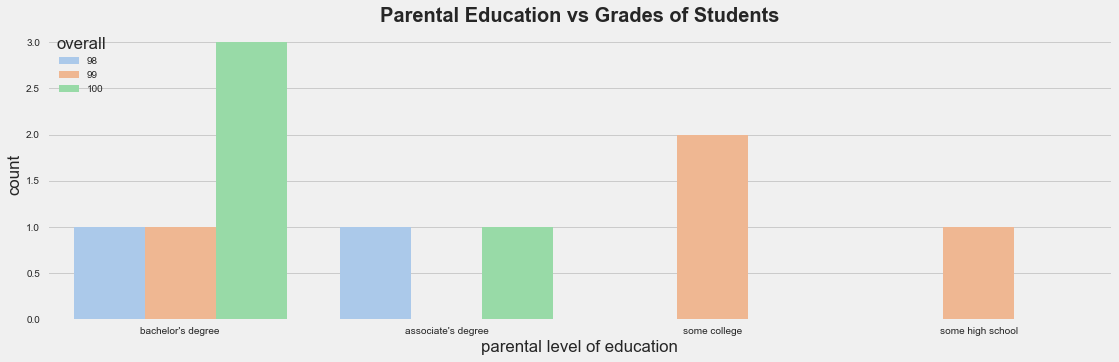

In [84]:
# Distribution of parental education vs grades of students
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))

sns.countplot('parental level of education', data = top_grades, hue = top_grades['overall'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 'bold')

plt.show()

Text(0.5, 1.0, 'Grades vs Gender')

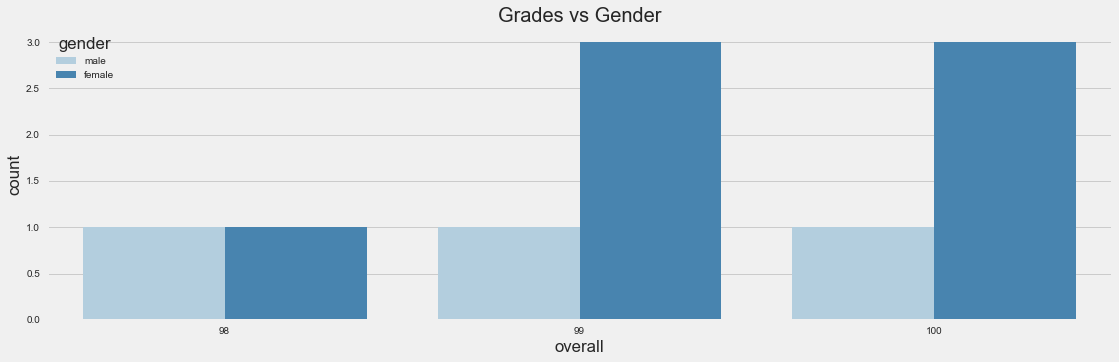

In [85]:
# Distribution of gender among gender of students
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))

sns.countplot('overall', data = top_grades, hue = top_grades['gender'], palette = 'Blues')
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)

We have displayed the students with the greatest grades. The Student with the highest score is the male student 916. There are 4 students who achived the absolute grade 100, one male and three females. We have also count the parental level of education and it is clear that the majority of them have higher education such as bachelor degree or a degree from a college. Also, we have count the lunch type and most of the students have standard lunch. We can observe that these students come from wealthy families.

#### Print the students with the worst grades

In [86]:
worst_grades = data.sort_values('overall', ascending=True).head(10)
worst_grades

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall,math_pass,reading_pass,writing_pass,status
59,female,group C,some high school,free/reduced,none,0,17,10,9,Fail,Fail,Fail,Fail
980,female,group B,high school,free/reduced,none,8,24,23,18,Fail,Fail,Fail,Fail
327,male,group A,some college,free/reduced,none,28,23,19,23,Fail,Fail,Fail,Fail
596,male,group B,high school,free/reduced,none,30,24,15,23,Fail,Fail,Fail,Fail
17,female,group B,some high school,free/reduced,none,18,32,28,26,Fail,Fail,Fail,Fail
76,male,group E,some high school,standard,none,30,26,22,26,Fail,Fail,Fail,Fail
601,female,group C,high school,standard,none,29,29,30,29,Fail,Fail,Fail,Fail
338,female,group B,some high school,free/reduced,none,24,38,27,30,Fail,Fail,Fail,Fail
211,male,group C,some college,free/reduced,none,35,28,27,30,Fail,Fail,Fail,Fail
787,female,group B,some college,standard,none,19,38,32,30,Fail,Fail,Fail,Fail


In [87]:
# Count the gender of students with the worst grades
worst_grades['gender'].value_counts()

female    6
male      4
Name: gender, dtype: int64

In [88]:
# Count the parental level of education
worst_grades['parental level of education'].value_counts()

some high school    4
high school         3
some college        3
Name: parental level of education, dtype: int64

In [89]:
worst_grades['lunch'].value_counts()

free/reduced    7
standard        3
Name: lunch, dtype: int64

In [90]:
c2 = pd.crosstab(worst_grades['parental level of education'], data['overall'])
c2

overall,9,18,23,26,29,30
parental level of education,,,,,,
high school,0,1,1,0,1,0
some college,0,0,1,0,0,2
some high school,1,0,0,2,0,1


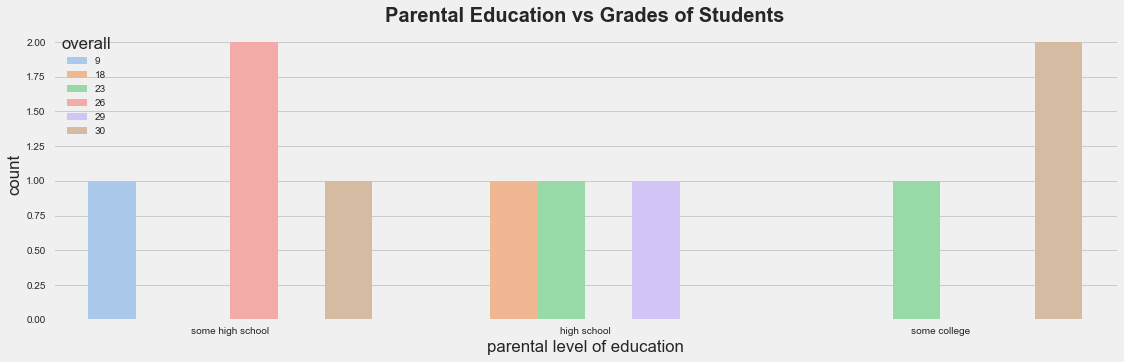

In [91]:
# Distribution of parental education vs grades of students
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))

sns.countplot('parental level of education', data = worst_grades, hue = worst_grades['overall'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 'bold')

plt.show()

Text(0.5, 1.0, 'Grades vs Gender')

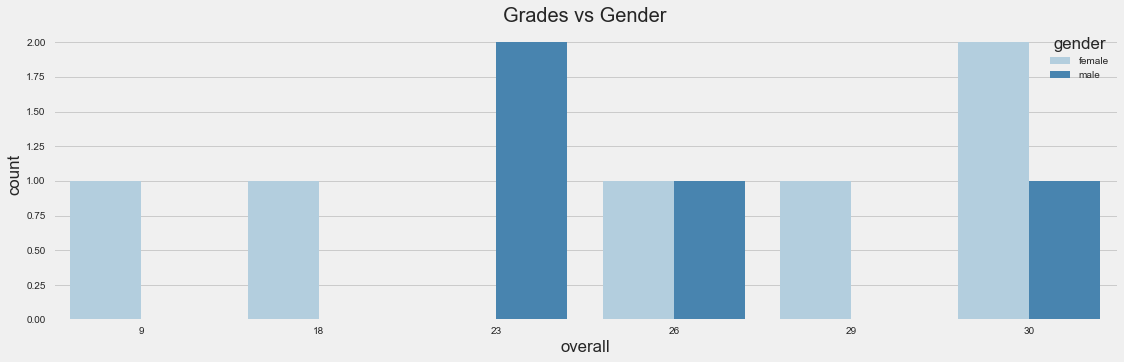

In [92]:
# Distribution of gender among gender of students
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))

sns.countplot('overall', data = worst_grades, hue = worst_grades['gender'], palette = 'Blues')
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)

The student with the worts grade is female. In contrary to students with the higher grades, the parental level of education of students with the worst grades is lower. Another difference between these two groups of students is the lunch type. Most of the students with lower grades have free  or reduced lunch, it means that they come from poorer families in contrary to the students who achived high grades. 

From this short analysis we can observe that parental level of education plays a crucial role on the education of the child.

In [93]:
g = data.groupby(['gender']).agg(['min','max','median'])
g

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100     65            17  100     73            10  100   
male           27  100     69            23  100     66            15  100   

              overall              
       median     min  max median  
gender                             
female     74       9  100     70  
male       64      23  100     66

#### Checking the skweness of math, reading and writing values

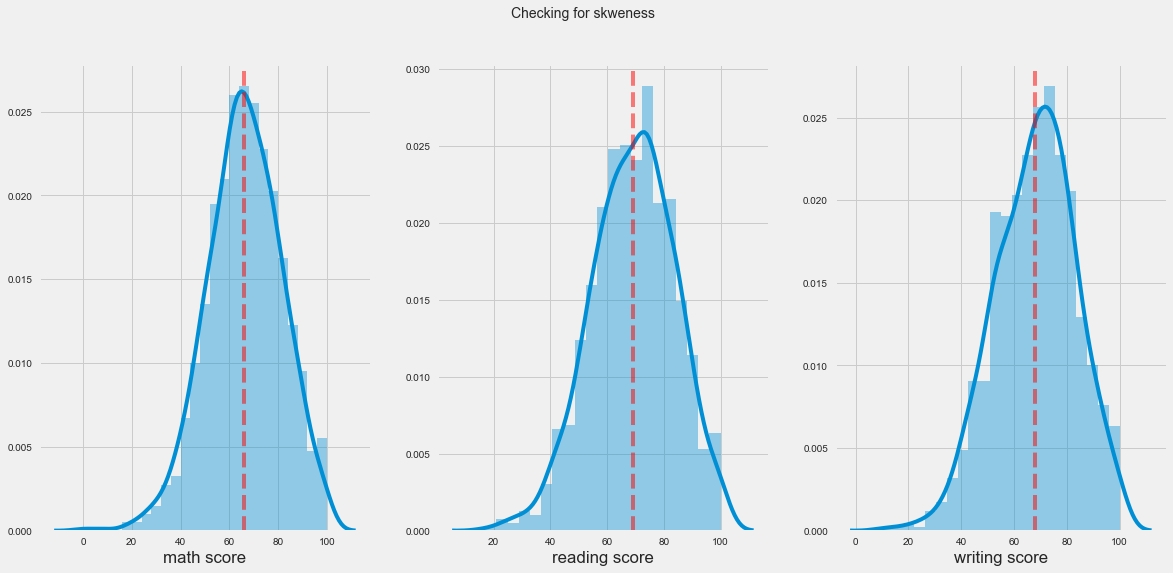

In [94]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.distplot(data['math score'])
mean_math = df['math score'].mean()
plt.axvline(mean_math, color = 'red', linestyle = 'dashed', alpha = 0.5)

plt.subplot(1,3,2)
sns.distplot(data['reading score'])
mean_reading = df['reading score'].mean()
plt.axvline(mean_reading, color = 'red', linestyle = 'dashed', alpha = 0.5)

plt.subplot(1,3,3)
sns.distplot(data['writing score'])
mean_writing = df['writing score'].mean()
plt.axvline(mean_writing, color = 'red', linestyle = 'dashed', alpha = 0.5)

plt.suptitle('Checking for skweness', fontsize = 14)
plt.show()

There is no skweness in the target columns. The mean line in each plot shows that the target columns have symmetrical distribution.  

In [95]:
students_performance_edit = data.to_csv('students_performance_edit.csv', index=False)